In [2]:
import numpy as np
import pandas as pd

In [3]:
DATA = 'informer_4G_ftMS_sl96_ll48_pl1_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0'

In [4]:
metrics = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/metrics.npy')
metrics

array([ 3.2875392, 19.607866 ,  4.428077 ,        inf,        inf],
      dtype=float32)

In [5]:
real_prediction = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/real_prediction.npy')
real_prediction

array([[[5.9203553]]], dtype=float32)

In [6]:
true = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/true.npy')
pred = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/pred.npy')

df = pd.DataFrame({'true': true.flatten(), 'pred': pred.flatten()})
df

,true,pred
0,15.90,8.494905
1,7.76,8.277704
2,0.00,8.114510
3,0.00,8.302279
4,16.40,7.656832
...,...,...
3003,0.00,2.127915
3004,0.00,3.509730
3005,0.00,3.719246
3006,0.00,4.318585


<Axes: >

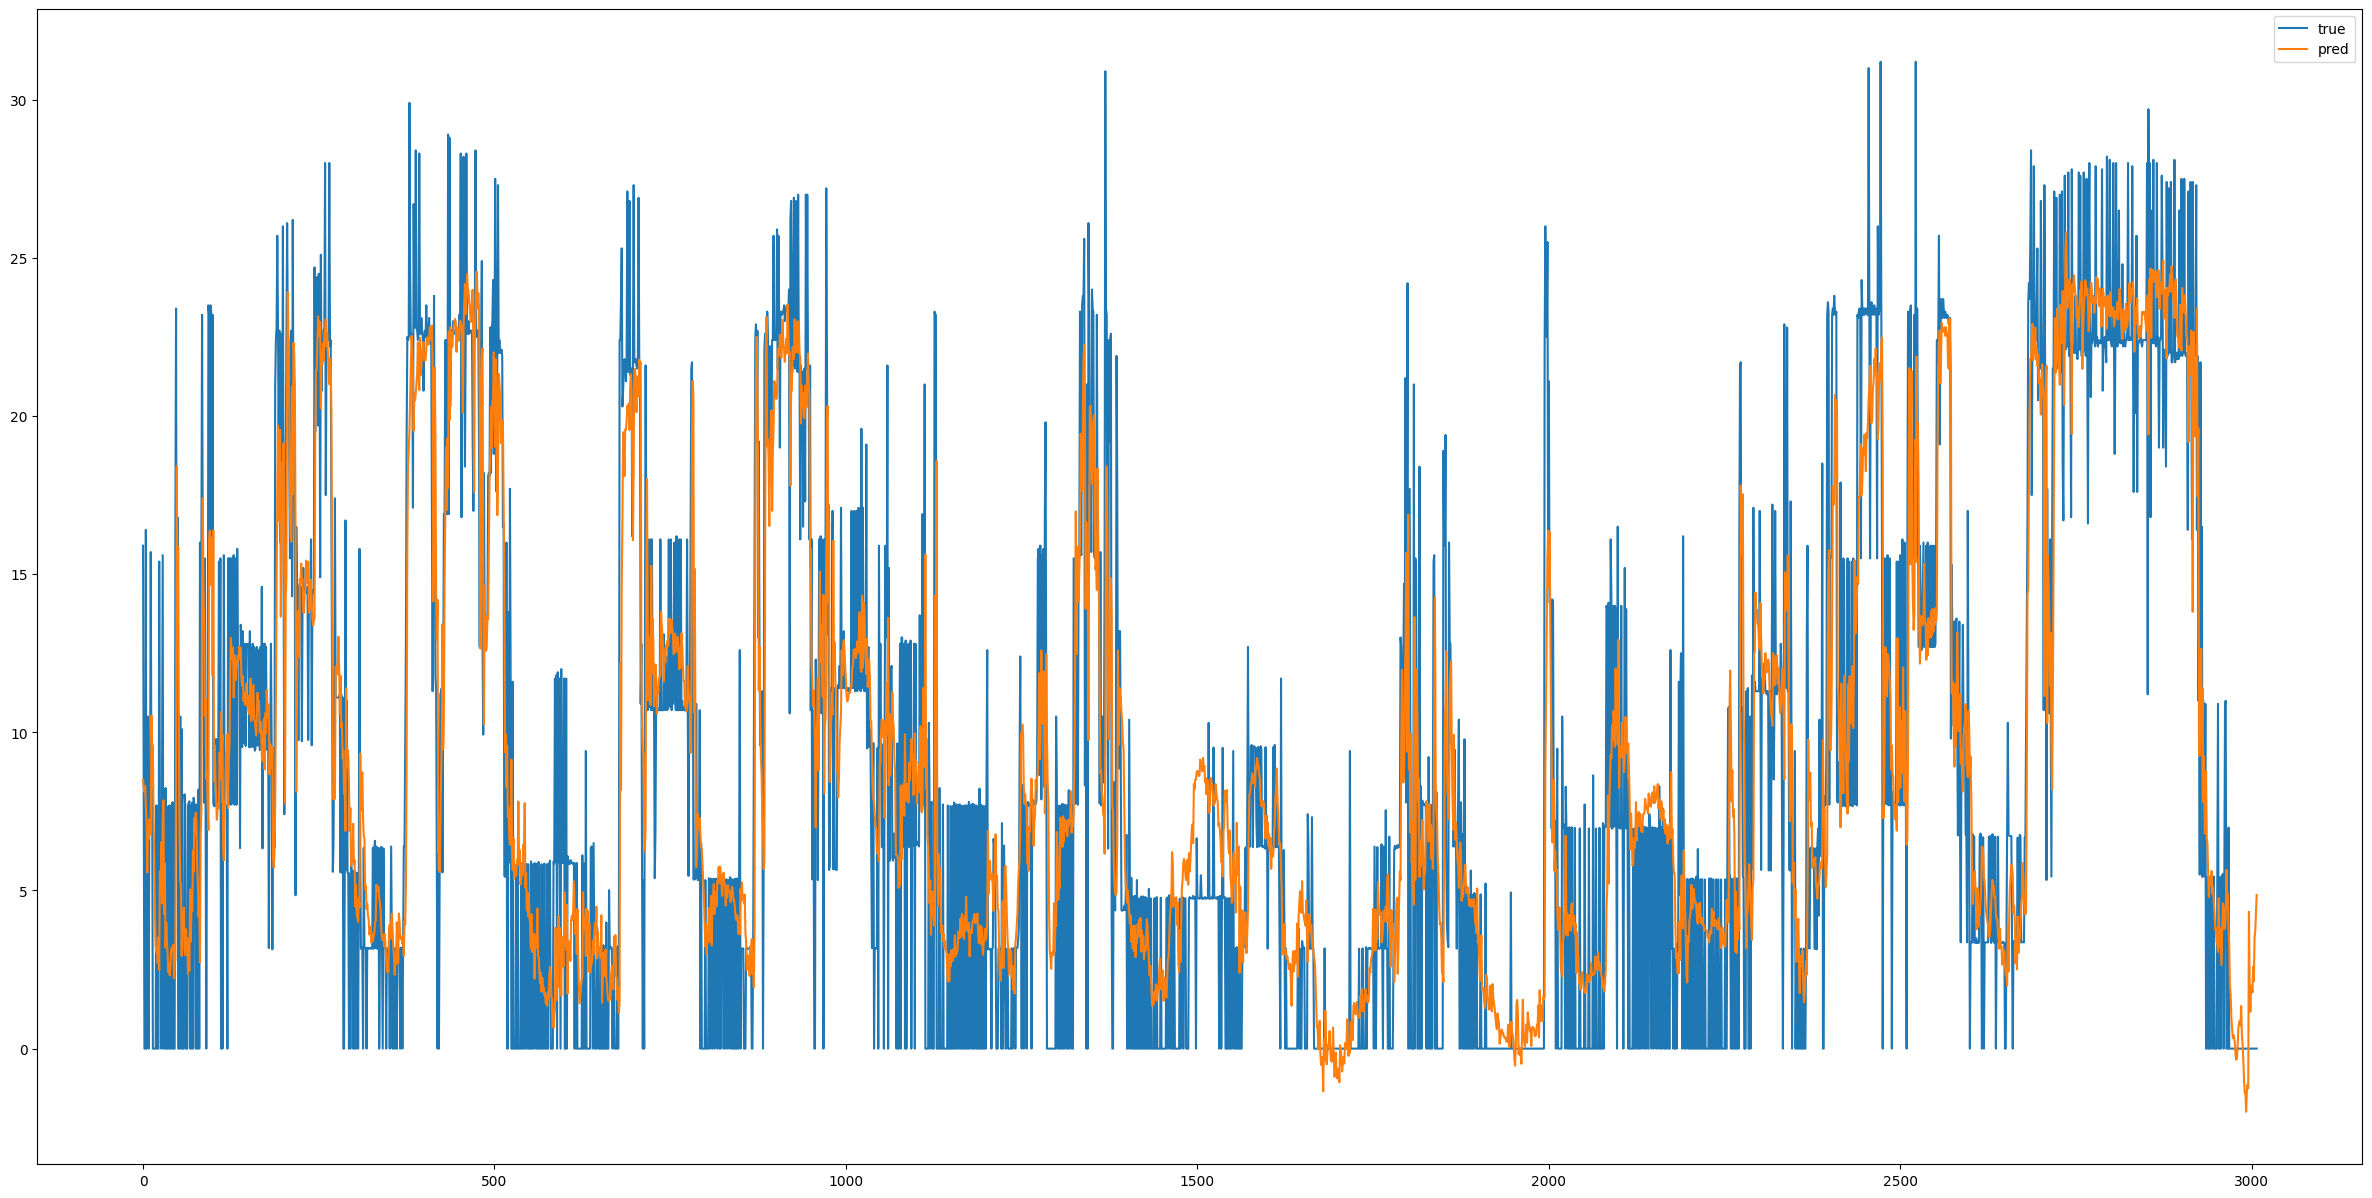

In [7]:
df.plot(figsize=(30,15))